In [2]:
# Retro to play street fighter, gym to create the environment
import gym, retro

# in roms python -m retro.import .

# import time to slow down the game
import time

# retrowrapper to create multiple environments in parallel execution

# Check versions
print("gym:", gym.__version__)    # should print 0.21.0
print("retro:", retro.__version__) # should print 0.8.0 (or whatever gym-retro version)


gym: 0.21.0
retro: 0.8.0


In [3]:
import os
import sys

print(f"Python version: {sys.version}")
print(f"Retro version: {retro.__version__ if hasattr(retro, '__version__') else 'Unknown'}")

Python version: 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
Retro version: 0.8.0


In [3]:
retro.data.list_games()


['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis',
 'AbadoxTheDeadlyInnerWar-Nes',
 'AcceleBrid-Snes',
 'ActRaiser2-Snes',
 'ActionPachio-Snes',
 'AddamsFamily-GameBoy',
 'AddamsFamily-Genesis',
 'AddamsFamily-Nes',
 'AddamsFamily-Sms',
 'AddamsFamily-Snes',
 'AddamsFamilyPugsleysScavengerHunt-Nes',
 'AddamsFamilyPugsleysScavengerHunt-Snes',
 'AdvancedBusterhawkGleylancer-Genesis',
 'Adventure-Atari2600',
 'AdventureIsland-GameBoy',
 'AdventureIsland3-Nes',
 'AdventureIslandII-Nes',
 'AdventuresOfBatmanAndRobin-Genesis',
 'AdventuresOfBayouBilly-Nes',
 'AdventuresOfDinoRiki-Nes',
 'AdventuresOfDrFranken-Snes',
 'AdventuresOfKidKleets-Snes',
 'AdventuresOfMightyMax-Genesis',
 'AdventuresOfMightyMax-Snes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Genesis',
 'AdventuresOfRockyAndBullwinkleAndFriends-Nes',
 'AdventuresOfRockyAndBullwinkleAndFriends-Snes',
 'AdventuresOfStarSaver-GameBoy',
 'AdventuresOfYogiBear-Snes',
 'AeroFighters-Snes',
 

In [4]:
print(retro.__version__)
print(gym.__version__)
print(dir(retro))
print(retro.get_romfile_system)

0.8.0
0.21.0
['Actions', 'Movie', 'Observations', 'ROOT_DIR', 'RetroEmulator', 'RetroEnv', 'State', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_retro', 'core_path', 'data', 'enums', 'f', 'get_core_path', 'get_romfile_system', 'get_system_info', 'make', 'os', 'path', 'retro', 'retro_env']
<function get_romfile_system at 0x0000018AD7C24040>


In [8]:
# Starts up the game environment
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')


In [9]:
env.observation_space

Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
 

In [10]:
env.action_space

# env.action_space.sample()

# Example: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] means only the button "B" is pressed
# 12 posible binary permutations (2^12 = 4096)


MultiBinary(12)

In [11]:
# Random agent that plays the game

# Reset game to initial state
obs = env.reset()

done = False
iterations = 1 #Modify to change number of games played

for game in range(iterations):
    while not done:
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        # time.sleep(0.01) # Uncomment to slow down the game
        print(reward, info, done)
    obs = env.reset()   
    done = False

0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'score': 0, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 176, 'health': 176} False
0.0 {'enemy_matches_won': 0, 'sc

In [12]:
# Parameters to consider
info

{'enemy_matches_won': 2,
 'score': 38100,
 'matches_won': 0,
 'continuetimer': 10,
 'enemy_health': 0,
 'health': 0}

In [4]:
# Setup Enviroment 

# Observation Preprocess - gray scale, frame delta, resize
# Filter actions - parameter
# Change Reward function 


# Import environment base class for a wrapper
from gym import Env
# Import the space shapes for the environment
from gym.spaces import MultiBinary, Box
# Import numpy to calculate frame delta
import numpy as np
# Import cv2 for gray scale 
import cv2
# pip install opencv-python

# Import matplotlib to plot images
from matplotlib import pyplot as plt
# pip install matplotlib

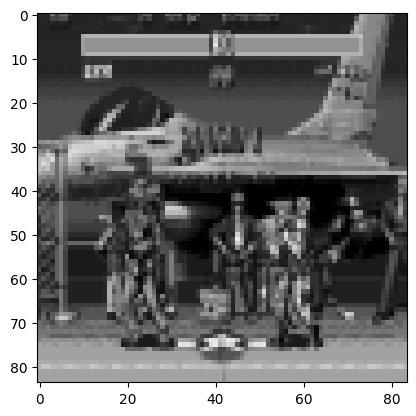

In [14]:
gray = cv2.cvtColor(obs, cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_AREA)

plt.imshow(cv2.cvtColor(resize, cv2.COLOR_BGR2RGB))

In [5]:
# Create custom environment
class StreetFighter(Env):
    def __init__(self):
        super().__init__()
        # Specify action and observation space
        self.observation_space = Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)
        self.action_space = MultiBinary(12)
        # Start and instance the game
        self.game = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis',
                               use_restricted_actions=retro.Actions.FILTERED)
        
    def reset(self):
        # Return the first frame
        obs = self.game.reset()
        # Frame delta = Current frame - previous frame        
        obs = self.preprocess(obs)

        self.previouse_frame = obs
        # Create an attribute to hold the score delta
        self.score = 0

        return obs

    def preprocess(self, observation):
        # Grayscaling
        gray = cv2.cvtColor(observation, cv2.COLOR_BGR2GRAY)
        # Resizing
        resize = cv2.resize(gray, (84, 84), interpolation = cv2.INTER_CUBIC)

        # Add the channels value
        channels = np.reshape(resize, (84, 84, 1))

        return channels

    def step(self, action):
        # Take a step 
        obs, reward, done, info = self.game.step(action)
        obs = self.preprocess(obs)
        # Frame delta = Current frame - previous frame
        frame_delta = obs - self.previouse_frame
        self.previouse_frame = obs

        # Custom reward function
        reward = info['score'] - self.score
        self.score = info['score']

        return frame_delta, reward, done, info

    def render(self, *args, **kwargs):
        self.game.render()

    def close(self):
        self.game.close()


In [17]:
env.close()

In [7]:
env = StreetFighter()

In [10]:
# Random agent that plays the game

# Reset game to initial state
obs = env.reset()

done = False
iterations = 5 #Modify to change number of games played

for game in range(iterations):
    while not done:
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        # time.sleep(0.01) # Uncomment to slow down the game
        if reward != 0:
            print(reward, info, done)
    obs = env.reset()   
    done = False

1000 {'enemy_matches_won': 0, 'score': 1000, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 122, 'health': 153} False
300 {'enemy_matches_won': 0, 'score': 1300, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 94, 'health': 153} False
100 {'enemy_matches_won': 0, 'score': 1400, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 73, 'health': 153} False
1000 {'enemy_matches_won': 0, 'score': 2400, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 73, 'health': 153} False
1000 {'enemy_matches_won': 0, 'score': 3400, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 27, 'health': 67} False
100 {'enemy_matches_won': 0, 'score': 3500, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 22, 'health': 59} False
300 {'enemy_matches_won': 0, 'score': 3800, 'matches_won': 0, 'continuetimer': 0, 'enemy_health': 3, 'health': 27} False
1500 {'enemy_matches_won': 0, 'score': 5300, 'matches_won': 1, 'continuetimer': 0, 'enemy_health': -1, 'health': 3} False
100 {'enemy_match